# Running MULTIGRIS (additional settings)

<font color=red>For best performance, it is advised to execute MULTIGRIS in the shell, as explained in the README. This notebook is just a way to illustrate a workflow. </font>

***
Motivations and goals:
- explain some additional options (e.g., several observation blocks) for [MULTIGRIS](https://gitlab.com/multigris). 

The following context will be used:
- SFGX (star-forming galaxies with X-ray component; Ramambason et al. [2022](https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..35R/abstract)) based on Cloudy models (Ferland et al. [2017](https://ui.adsabs.harvard.edu/abs/2017RMxAA..53..385F/abstract))

The various notebooks use some specific terms described in the file [TERMS.org](https://gitlab.com/multigris/mgris/-/blob/master/TERMS.org?ref_type=heads). 
***

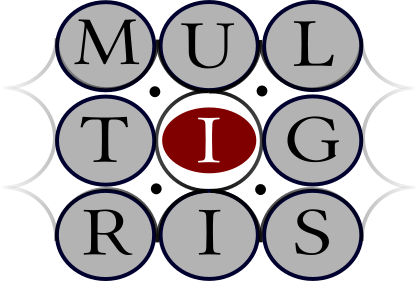

In [1]:
%load_ext autoreload
%autoreload 2
from wand.image import Image as WImage #this is to view PDFs
from IPython.display import Image
Image(filename='../Images/logo.png') 

## Model table and context preparation <a class="anchor" id="s1"></a>
***

We're not running from the program root directory so let's add it to the path

In [2]:
import sys, os
sys.path.append('../') 

import pickle
import importlib
import Library.lib_input
importlib.reload(Library.lib_input)
from Library.lib_input import *
sys.path.append('../') 
from Library.lib_main import closelogfiles

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We will use the SFGX context for this example. 

In [3]:
context = 'Contexts/mgris_sfgx/'

## Some settings <a class="anchor" id="s2"></a>
***

In [4]:
output_directory = './Runs/howto/advanced'
os.makedirs(output_directory, exist_ok=True)
inputfile = output_directory+'/input_advanced.txt'

## Create the input file <a class="anchor" id="s3"></a>
***

In [5]:
params = get_params()

In [6]:
params['output'].value = output_directory
params['context'].value = context
params['USE configuration'].value = '1C2S'

Here we show that priors can tie parameters with each other within literal equations

In [7]:
params['BEGIN configuration'].value = '''age (0) < 0.2
Z (0) = -1 0.1
u (1) = u (0) * n (0) / n(1)'''

#let's comment this for now, this was just an example
params['BEGIN configuration'].comment()

We will use a linear interpolation for Z though:

In [8]:
params['BEGIN configuration'].value = '''distrib Z single linear'''
params['BEGIN configuration'].uncomment()

We can use a subset of the grid by fixing some parameters or by using lower/upper bounds ("hard" constraints)

In [9]:
params['select'].value = ['cut [0,2.25]', 'Lx [-40,-40]', 'lum [9,9]', 'Z_dust [0,0]']

In [10]:
params['sysunc'].value = ["elemental_abundances 0.2 ['O351.8004m', 'O1145.495m', 'O163.1679m', 'O388.3323m']",
                          "irs 0.2 ['Si234.8046m', 'S333.4704m', 'Ne524.2065m', 'Ne212.8101m', 'Ne315.5509m', 'Ne514.3228m']"]

#let's comment this for now, this was just an example
params['sysunc'].comment()

Now we build the list of tracers and values

In [11]:
params['observation_sets'] = [InputParameter('BEGIN observations'),
                              InputParameter('BEGIN observations'), ]

This is the first observation set

In [12]:
labels = ['N2205.244m', 
          'H217.0300m', 
          'Si234.8046m', 
          'Ne212.8101m', 
          'Ne315.5509m', 
          'Ne514.3228m']
values = [10**36.51495,
          10**38.50008,
          10**39.61371,
          10**38.22829,
          10**39.30396,
          10**37.52060]

params['observation_sets'][0].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][0].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][0].extras = {'delta_ref': 1e36, 'delta_add': 0.1, 'scale': 'linear', 'scale_factor': 1, 'name': 'setobs1'}

This is the second observation set. Here we show how to disable it (it will not be used for inference) and how to include it in the tracers to predict instead ("predict" keyword)

In [13]:
labels = ['C2157.636m', 
          'O163.1679m', 
          'O388.3323m']
values = [0.1*10**39.60373,
          0.1*10**39.96645,
          0.1*10**39.23215]

params['observation_sets'][1].value = ''
for i,l in enumerate(labels):
    params['observation_sets'][1].value += '{} {}\n'.format(l, values[i])
params['observation_sets'][1].extras = {'delta_ref': 1e36, 'delta_add': 0.1, 'scale': 'linear', 'scale_factor': 10, 'name': 'setobs2', 'disabled': True, 'predict': True}

In [14]:
params['use_scaling'].value = "'all'"

We can add other non-observed tracers to predict

In [15]:
params['obs_to_predict'].value = ['H16562.81A', 'N2121.767m', 'O351.8004m', 'Ne524.2065m', 'O1145.495m', 'S333.4704m', 'Ne53426.03A', 'H14861.33A'] 
params['secondary_parameters'].value = ['MHII']

It's possible to use a context-specific rule with a parameter that differs for every component

In [16]:
params['active_rules'].value = ['extinction_persector']

#let's comment this for now, this was just an example
params['active_rules'].comment()

Finally write down the input file

In [17]:
make_input(params, inputfile)

In [18]:
%cat $inputfile

##################################
#### INPUT FILE FOR MULTIGRIS ####
##################################

# Generated automatically
# Date: Fri 06 September 2024 - 20:49:06
    

#------------------------------------------------------------------
#VERSIONS
#------------------------------------------------------------------

# Python
#  - version      : 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
#  - bin          : /local/home/vleboute/miniconda3/bin/python
#  - prefix       : /local/home/vleboute/miniconda3

# PyMC
#  - version      : 5.16.2

# mgris
#  - git commit   : 1a38371
#  - (date)       : 2024-09-06 08:20:37 +0200
#  - (submodules) : 'Contexts/mgris_bond': 474a7c3, 'Contexts/mgris_loc': 78805da, 'Contexts/mgris_sfgx': dcd6f15

#------------------------------------------------------------------





#---------------------------------------------------------------------
#OUTPUT
#---------------------------------------------------------------------

# OUTPUT PATH (Mandator

## Run the scripts <a class="anchor" id="s1"></a>
***

In [19]:
import mgris_search, mgris_process, mgris_post_process

Checking path in case several copies exist

In [20]:
mgris_search.__file__

'/local/home/vleboute/work/MULTIGRIS/mgris/mgris_search.py'

In [21]:
closelogfiles() #in case run was interrupted
mgris_search.main(args=mgris_search.args(inputfile=inputfile, nsamples_per_job=200))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍           ┑
     ┝ INFERENCE ┥
     ┕           ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INPUT PARAMETERS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C2S

    ┍========================================┑
    ┝========= MULTIGRIS summary ============┥
    ┝========================================┙
    ┝ git version & date:
    ┝ - 1a38371 (2024-09-06 08:20:37 +0200)
    ┝ - 1a38371
    ┝ git submodules:
    ┝ - 'Contexts/mgris_bond': 474a7c3, 'Contexts/mgris_loc': 78805da, 'Contexts/mgris_sfgx': dcd6f15 
    ┝========================================
    ┝ PyMC version  : 5.16.2
    ┝ Tensor library: pytensor
    ┝ - Compile directory:
    ┝   - /tmp/pytensor.NOBACKUP
    ┝ - Precision: float32
    ┕=============

[ 6  8  5  5  8 10]
-> [ 6  1  5  5  8 10]
[ 6  1  5  5  8 10]


u 0: single value (nearest neighbor grid interpolation)


-> [ 6  1  1  5  8 10]
[ 6  1  1  5  8 10]


cut 0: single value (nearest neighbor grid interpolation)


-> [ 6  1  1  1  8 10]
-> [ 6  1  1  1  8 10]
[ 6  1  1  1  8 10]


Z 0: single value (linear interpolation)


-> [6 1 1 1 8 1]
[6 1 1 1 8 1]


age 1: single value (nearest neighbor grid interpolation)
n 1: single value (nearest neighbor grid interpolation)
u 1: single value (nearest neighbor grid interpolation)


-> [6 1 1 1 1 1]
[ 6  8  5  5  8 10]
-> [ 6  1  5  5  8 10]
[ 6  1  5  5  8 10]
-> [ 6  1  1  5  8 10]
[ 6  1  1  5  8 10]
-> [ 6  1  1  1  8 10]


cut 1: single value (nearest neighbor grid interpolation)


-> [ 6  1  1  1  8 10]
[ 6  1  1  1  8 10]


Z 1: single value (linear interpolation)


-> [6 1 1 1 8 1]
[6 1 1 1 8 1]
-> [6 1 1 1 1 1]



Calculating prior predictive sample...
--------------------------------------
Sampling: [idx_Z_0, idx_age_0, idx_cut_0, idx_cut_1, idx_n_0, idx_n_1, idx_u_0, idx_u_1, scale, w]
Sampling: [idx_Z_0, idx_age_0, idx_cut_0, idx_cut_1, idx_n_0, idx_n_1, idx_u_0, idx_u_1, scale, w]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
idx_Z_0          3.486  1.980   0.040    6.551      0.088    0.062     495.0   
idx_Z_1          3.486  1.980   0.040    6.551      0.088    0.062     495.0   
idx_age_0        3.722  1.852   0.660    6.994      0.080    0.057     546.0   
idx_age_1        3.722  1.852   0.660    6.994      0.080    0.057     546.0   
idx_cut_0        4.431  2.438   0.539    8.662      0.125    0.090     381.0   
idx_cut_1        4.546  2.504   0.629    8.883      0.112    0.081     502.0   
idx_n_0          2.002  1.114   0.300    3.994      0.051    0

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details

✨
✨✨
✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨
✨✨✨✨✨
✨✨
✨
✨✨
✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨ INFERENCE END
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨✨✨✨✨✨✨
✨✨✨✨✨✨✨
✨✨✨✨
✨✨
✨
Inference ended     : 2024-09-06 20:49:59.771873
Time used           : 0.9 min.
Sampling time used  :  0.29 min.
Garbage collection thresholds : (700, 10, 10)
Garbage collector: collected 711619 objects.

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ RESULTS AND VERIFICATIONS ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


                          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
idx_Z_0                  2

In [22]:
closelogfiles() #in case run was interrupted
mgris_process.main(args=mgris_process.args(inputfile=inputfile))







       ┍ M U L ┑
       ┝ T I G ┥
       ┕ R I S ┙






     ┍            ┑
     ┝ PROCESSING ┥
     ┕            ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).

▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
▓ READING INFERENCE DATA ▓
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


-- Using pre-defined configuration 1C2S







    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 06/09/2024 20:50:01
    ┕========================================┙
   







    ┍========================================┑
    ┝============= Run summary ==============┥
    ┝========================================┙
    ┝ - input file         : ./Runs/howto/advanced/input_advanced.txt
    ┝ - output directory   : ./Runs/howto/advanced/
    ┕========================================┙
    
List of

In [23]:
closelogfiles() #in case run was interrupted
mgris_post_process.main(args=mgris_post_process.args(inputfile=inputfile))







          ┍ M U L ┑
          ┝ T I G ┥
          ┕ R I S ┙






     ┍                 ┑
     ┝ POST-PROCESSING ┥
     ┕                 ┙






Thanks for using MULTIGRIS.
Please make sure to check the README file, the notebooks, and the publication (https://ui.adsabs.harvard.edu/abs/2022A%26A...667A..34L/abstract).







    ┍========================================┑
    ┝=========== System summary =============┥
    ┝========================================┙
    ┝ Date/time:
    ┝ - 06/09/2024 20:50:22
    ┕========================================┙
   
-- Using pre-defined configuration 1C2S

    Run summary
    - input file         : ./Runs/howto/advanced/input_advanced.txt
    - output directory   : ./Runs/howto/advanced/
    
Loading multi-trace...
Reading post-processing file ['post_processing_all_cutAv.fth', '#model_number']
Reading Feather file... /local/home/vleboute/work/MULTIGRIS/mgris/Contexts/mgris_sfgx/Grids/model_grid.fth (run pre-processing script if the latte

Below we see the predicted observables. For some of them the code automatically converts it to linear because it was used in an observation set that uses linear scale by default. For the other observables, the same scaling as the model table (log) is used. 

In [24]:
%cat $output_directory/results_pp.txt



 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
 ▒▒▒▒ PREDICTED OBSERVABLES ▒▒▒▒
 ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

 [log/linear scale same as model table by default]


   ..............................................................
   N2121.767m       :  (3.69e+01 ) 3.69e+01  +3.31e-01  -3.49e-01 
   ..............................................................
   Ne53426.03A      :  (3.13e+01 ) 3.10e+01  +5.40e+00  -5.59e+00 
   ..............................................................
   O1145.495m       :  (3.91e+01 ) 3.92e+01  +2.06e-01  -3.16e-01 
   ..............................................................
   H16562.81A       :  (4.08e+01 ) 4.08e+01  +1.43e-01  -1.54e-01 
   ..............................................................
   S333.4704m       :  (3.91e+01 ) 3.92e+01  +1.36e-01  -2.89e-01 
   ..............................................................
   H14861.33A       :  (4.02e+01 ) 4.02e+01  +1.78e-01  -1.32e-01 
   ............................................

## Going further <a class="anchor" id="s9"></a>
***

- Check this [notebook](2_How_to_run_number_of_samples.ipynb) to assess the number of samples.
- Check this [notebook](3_How_to_run_convergence_checks.ipynb) to improve the runs and the diagnostics.
- Check this [notebook](5_How_to_run_datasets.ipynb) to use MULTIGRIS on several/many datasets.
- Check the [ISM application notebooks](ISM_applications.ipynb) for in-depth examples.